# Task-1: - Perform following operations on image


In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [26]:
image_path = 'Lena_Image.png'
gray_image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

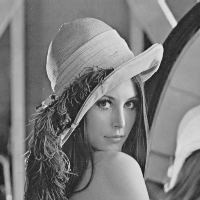

In [27]:
resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_linear)


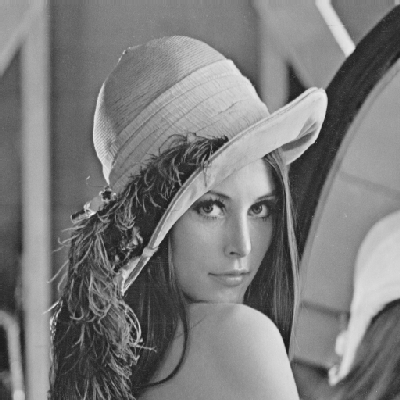

In [28]:
resized_nearest = cv2.resize(image, (400, 400), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_nearest)

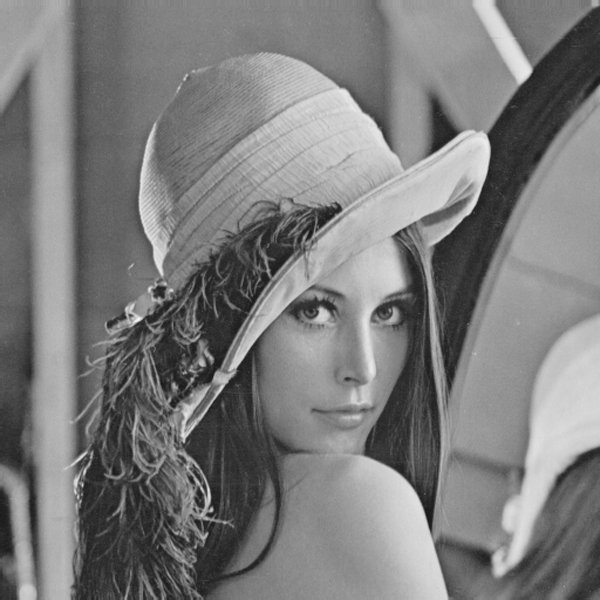

In [29]:
resized_cubic= cv2.resize(image, (600, 600), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_cubic)

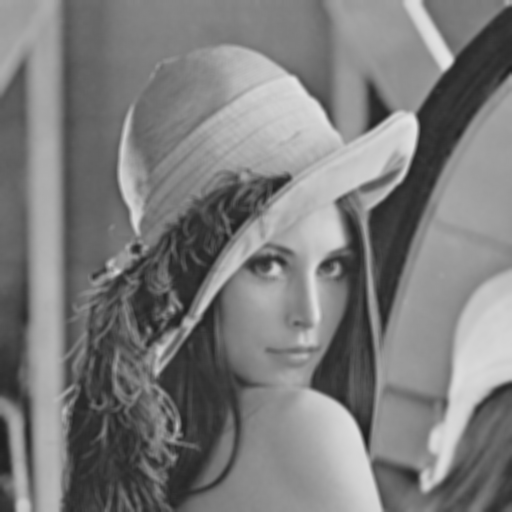

In [30]:
box_blur= cv2.blur(image, (5, 5))
cv2_imshow(box_blur)

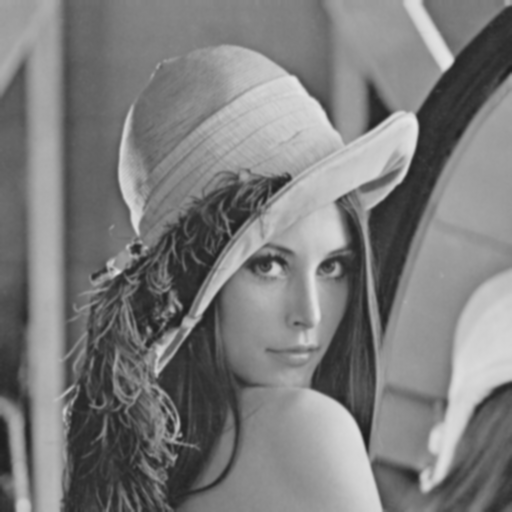

In [31]:
gaussian_blur= cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(gaussian_blur)

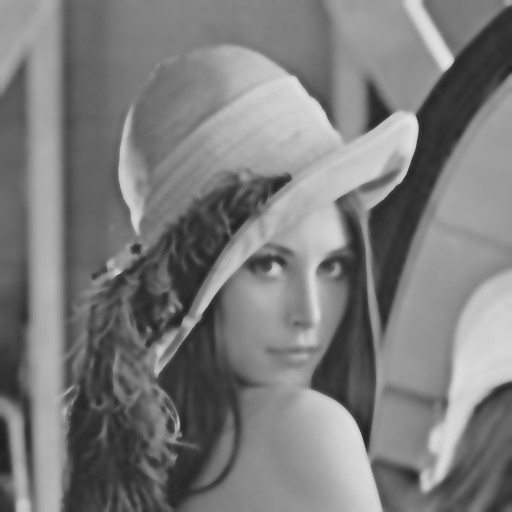

In [33]:
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)
cv2_imshow(adaptive_blur)

# Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K fold Cross Validation with (80-20 train-test split).  


Naive Bayes Results:
Accuracy: 0.5558
Precision: 0.6917258486386416
Recall: 0.5558
F1 Score: 0.5170420327932064
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]

Random Forest Results:
Accuracy: 0.9704
Precision: 0.9703956228285179
Recall: 0.9704
F1 Score: 0.9703722598097009
Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8 

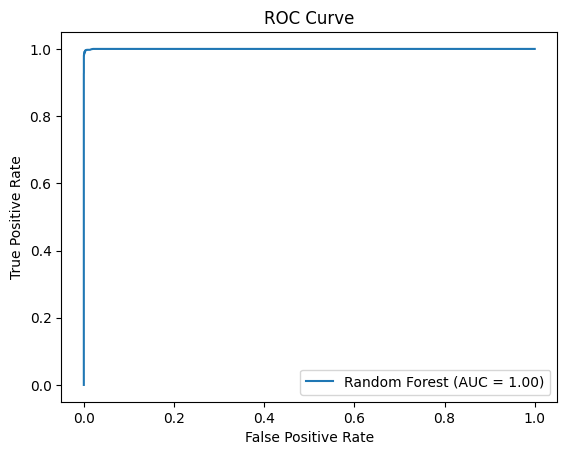

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Select two algorithms to implement (Naive Bayes and Random Forest for example)

# 1. Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)

# Metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_cm = confusion_matrix(y_test, nb_predictions)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_cm = confusion_matrix(y_test, rf_predictions)

# ROC and AUC for Random Forest
rf_probs = rf_model.predict_proba(x_test)
rf_roc_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr')
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1], pos_label=1)

# Display Results
print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Confusion Matrix:\n{nb_cm}")

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_cm}")
print(f"AUC: {rf_roc_auc}")

# Plot ROC Curve for Random Forest
plt.figure()
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
